In [1]:
import tensorflow as tf
import keras
import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model
import os, shutil, pathlib
from PIL import Image
import json

np.random.seed(21)

2024-06-02 18:05:21.266757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def make_graphs(obj, title):
    epochs = len(obj.history['loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)  # Title for the whole figure
    make_graphs_loss(obj, epochs, axes[0])
    make_graphs_accuracy(obj, epochs, axes[1])
    plt.tight_layout()

def make_graphs_loss(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['loss']
    val_acc = obj.history['val_loss']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Loss', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Training vs Validation Loss')
    ax.legend()

def make_graphs_accuracy(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['accuracy']
    val_acc = obj.history['val_accuracy']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Accuracy', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Accuracy', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs Validation Accuracy')
    ax.legend()

In [3]:
train_dataset = image_dataset_from_directory(
    r'images_sorted_tvts/train',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

val_data = image_dataset_from_directory(r'images_sorted_tvts/validation',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

Found 4420 files belonging to 37 classes.


2024-06-02 18:05:28.483073: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:05:28.487409: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:05:28.487447: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:05:28.488542: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 18:05:28.488568: I external/local_xla/xla/stream_executor

Found 1478 files belonging to 37 classes.


In [11]:
# Take parameters tuned from baseline and train longer, with no early stopping  
# The baseline validation accuracy to beat is 0.9188

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

hist = Xception_Model.fit(train_dataset, epochs=30, validation_data=val_data, verbose=1)

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.4101 - loss: 1.4608 - val_accuracy: 0.8870 - val_loss: 0.1699
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8049 - loss: 0.4084 - val_accuracy: 0.8816 - val_loss: 0.2268
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8746 - loss: 0.2969 - val_accuracy: 0.9066 - val_loss: 0.2176
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9157 - loss: 0.2202 - val_accuracy: 0.9032 - val_loss: 0.2117
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9285 - loss: 0.2148 - val_accuracy: 0.9154 - val_loss: 0.2393
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9452 - loss: 0.1586 - val_accuracy: 0.9005 - val_loss: 0.2408
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9534 - loss: 0.1564 - val_accuracy: 0.9066 - val_loss: 0.3447
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9588 - loss: 0.1507 - 

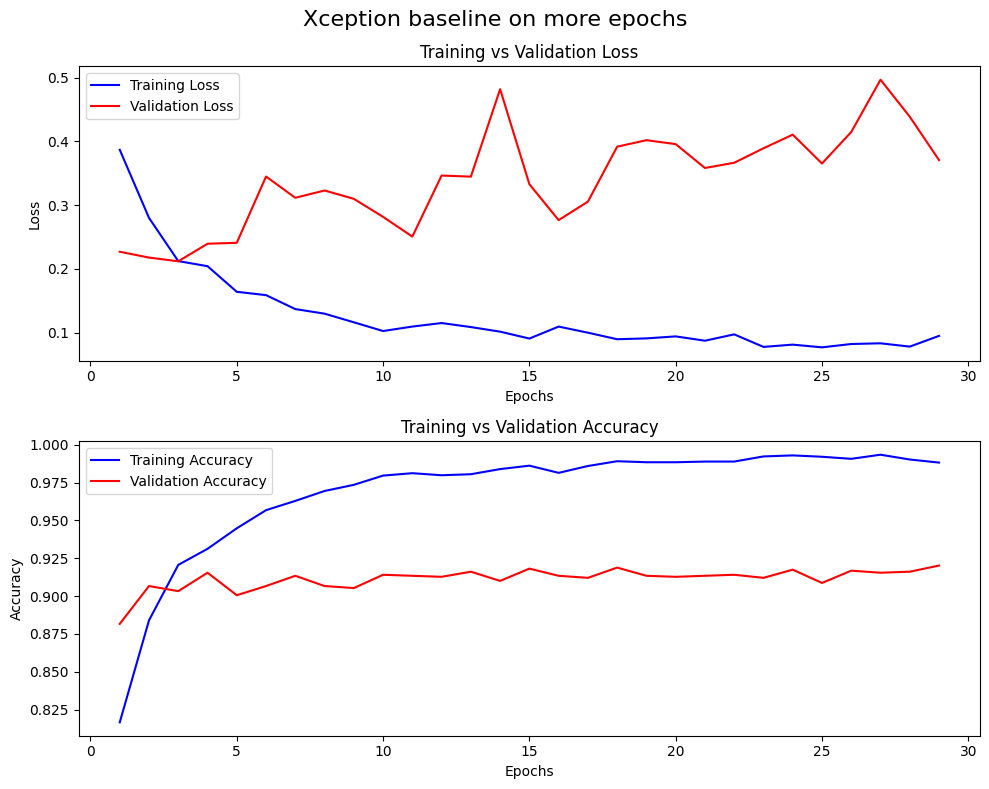

In [12]:
make_graphs(hist, "Xception baseline on more epochs")

In [17]:
# Tripling epochs helps a bit. Try other things
# Try categorical_crossentropy since this is multi-class, single label.

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

hist = Xception_Model.fit(train_dataset, epochs=30, validation_data=val_data, verbose=1)

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.6038 - loss: 16.2244 - val_accuracy: 0.8863 - val_loss: 5.4264
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8567 - loss: 7.4177 - val_accuracy: 0.8985 - val_loss: 5.3724
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9041 - loss: 4.4005 - val_accuracy: 0.9012 - val_loss: 5.9524
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9362 - loss: 3.1835 - val_accuracy: 0.9005 - val_loss: 6.9143
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9442 - loss: 2.9613 - val_accuracy: 0.9127 - val_loss: 5.7804
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9411 - loss: 2.7077 - val_accuracy: 0.9032 - val_loss: 7.7007
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9601 - loss: 1.9826 - val_accuracy: 0.8931 - val_loss: 8.5770
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9629 - loss: 1.6931 -

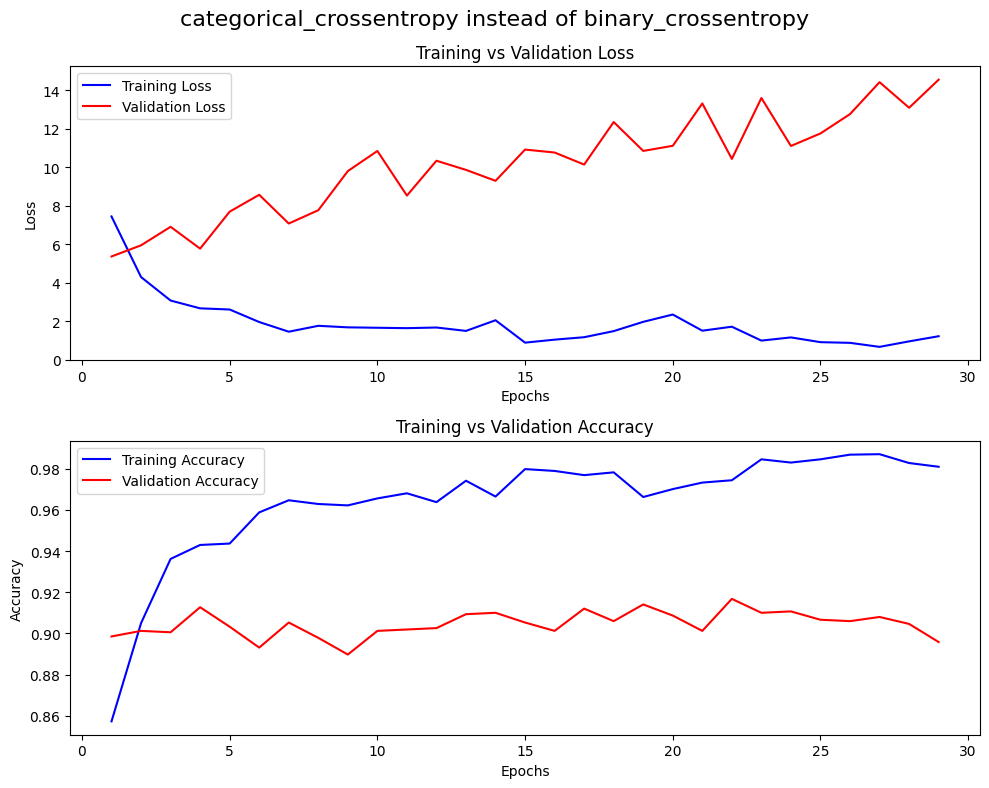

In [18]:
make_graphs(hist, "categorical_crossentropy instead of binary_crossentropy")

In [22]:
# Not really any better, though I'm gonna stick with categorical_crossentropy for now since that's what the literature suggests. 
# Try more a drastic change by adding more top layers.
# Since the best baseline used 128 neurons, try going even higher.
# Might as well also do batch normalization and regularization. Can tune this part later.

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=50, validation_data=val_data, callbacks = [callback], verbose=1)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - accuracy: 0.2578 - loss: 24.1794 - val_accuracy: 0.8708 - val_loss: 11.7663
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.6167 - loss: 12.2596 - val_accuracy: 0.8606 - val_loss: 9.1468
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.6487 - loss: 10.1461 - val_accuracy: 0.8471 - val_loss: 8.5235
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.6678 - loss: 11.4035 - val_accuracy: 0.8254 - val_loss: 7.7577
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.6802 - loss: 15.9905 - val_accuracy: 0.8451 - val_loss: 8.4021
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.6963 - loss: 9.4555 - val_accuracy: 0.8336 - val_loss: 6.8471
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.7070 - loss: 9.9106 - val_accuracy: 0.8065 - val_loss: 6.9367
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.6969 - loss: 9.

In [23]:
# Take out the 512 neuron layer

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=50, validation_data=val_data, callbacks = [callback], verbose=1)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.3901 - loss: 12.6118 - val_accuracy: 0.8708 - val_loss: 6.0818
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7169 - loss: 6.3758 - val_accuracy: 0.8532 - val_loss: 5.2392
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7223 - loss: 6.5894 - val_accuracy: 0.8654 - val_loss: 4.7682
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7214 - loss: 5.6129 - val_accuracy: 0.8701 - val_loss: 4.5708
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7423 - loss: 5.2196 - val_accuracy: 0.8572 - val_loss: 4.5373
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.7194 - loss: 6.8988 - val_accuracy: 0.8687 - val_loss: 4.3764
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7461 - loss: 5.0690 - val_accuracy: 0.8417 - val_loss: 4.1527
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7521 - loss: 4.8513 

In [25]:
# Take out BatchNormalization and regularization

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=50, validation_data=val_data, callbacks = [callback], verbose=1)

Epoch 1/50


I0000 00:00:1717272353.966044    9348 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5496', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1717272353.966034    9347 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5561', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1717272354.153673    9351 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5496', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1717272354.184238    9342 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5496', 32 bytes spill stores, 32 bytes spill loads



139/139 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.4826 - loss: 38.7373 - val_accuracy: 0.8701 - val_loss: 9.0895
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7904 - loss: 19.9789 - val_accuracy: 0.8742 - val_loss: 12.2454
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.8168 - loss: 19.2582 - val_accuracy: 0.8945 - val_loss: 10.9261
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.8531 - loss: 15.6769 - val_accuracy: 0.8972 - val_loss: 11.6233
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8913 - loss: 12.6932 - val_accuracy: 0.8958 - val_loss: 13.6526
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9046 - loss: 9.7385 - val_accuracy: 0.9073 - val_loss: 12.3071
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9101 - loss: 9.9794 - val_accuracy: 0.8978 - val_loss: 13.1577
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9242 - loss: 8.0705 -

In [26]:
# Try 512 layer again, without BatchNormalization and regularization

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.Dense(512)(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=50, validation_data=val_data, callbacks = [callback], verbose=1)

Epoch 1/50


I0000 00:00:1717272820.647154   11013 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5889', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1717272820.829781   11015 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5889', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1717272820.836470   11012 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5954', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1717272820.845170   11016 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5954', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1717272820.846974   11019 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5889', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1717272820.942770   

139/139 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.3655 - loss: 91.5972 - val_accuracy: 0.8782 - val_loss: 15.1939
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7034 - loss: 61.9670 - val_accuracy: 0.8816 - val_loss: 20.7433
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7660 - loss: 59.3148 - val_accuracy: 0.8911 - val_loss: 22.9046
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8077 - loss: 50.3132 - val_accuracy: 0.8999 - val_loss: 21.2309
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8430 - loss: 44.0581 - val_accuracy: 0.9046 - val_loss: 23.5648
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8471 - loss: 42.9858 - val_accuracy: 0.9066 - val_loss: 28.3989
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8587 - loss: 40.6752 - val_accuracy: 0.8890 - val_loss: 33.8097
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8672 - loss: 42.87

In [27]:
# Pretty much the same. Go back to binary cross entropy, since it was better for some reason. 

# Take out BatchNormalization and regularization

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=50, validation_data=val_data, callbacks = [callback], verbose=1)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.2574 - loss: 3.5299 - val_accuracy: 0.8633 - val_loss: 0.4915
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6264 - loss: 1.4467 - val_accuracy: 0.9046 - val_loss: 0.4645
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7375 - loss: 1.2647 - val_accuracy: 0.9066 - val_loss: 0.5249
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7890 - loss: 0.9931 - val_accuracy: 0.9100 - val_loss: 0.4960
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8227 - loss: 0.9597 - val_accuracy: 0.9019 - val_loss: 0.5876
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8508 - loss: 0.8610 - val_accuracy: 0.9093 - val_loss: 0.4064
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8687 - loss: 0.7220 - val_accuracy: 0.9060 - val_loss: 0.6873
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8830 - loss: 0.7019 -

In [28]:
# Try just BatchNormalization without regularization

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=50, validation_data=val_data, callbacks = [callback], verbose=1)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.1882 - loss: 0.8189 - val_accuracy: 0.8241 - val_loss: 0.3528
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.3878 - loss: 0.3385 - val_accuracy: 0.8681 - val_loss: 0.0856
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.6252 - loss: 0.1103 - val_accuracy: 0.8762 - val_loss: 0.0517
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7819 - loss: 0.0680 - val_accuracy: 0.8985 - val_loss: 0.0364
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8483 - loss: 0.0513 - val_accuracy: 0.9120 - val_loss: 0.0288
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.8688 - loss: 0.0451 - val_accuracy: 0.9134 - val_loss: 0.0242
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9044 - loss: 0.0381 - val_accuracy: 0.9161 - val_loss: 0.0215
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9187 - loss: 0.0332 -

In [30]:
# Finally got a validation acc better than baseline.
# Try different types of regularization (L1, L1_L2)

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(256, kernel_regularizer=regularizers.l1_l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, kernel_regularizer=regularizers.l1_l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_dataset, epochs=30, validation_data=val_data, callbacks = [callback], verbose=1)

# Both result in very low accuracy

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.0713 - loss: 213.1356 - val_accuracy: 0.0115 - val_loss: 52.4155
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.0438 - loss: 52.6293 - val_accuracy: 0.0447 - val_loss: 50.0912
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.0280 - loss: 50.1016 - val_accuracy: 0.0643 - val_loss: 48.4648
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.0428 - loss: 49.2264 - val_accuracy: 0.0135 - val_loss: 51.6798
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.0368 - loss: 47.7580 - val_accuracy: 0.0622 - val_loss: 44.5126
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.0466 - loss: 44.3403 - val_accuracy: 0.1083 - val_loss: 40.8793
Epoch 7/30
136/139 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1002 - loss: 40.8382

KeyboardInterrupt: 

In [38]:
# Add data augmentation

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
hist = Xception_Model.fit(train_datagen, epochs=50, validation_data=val_datagen, callbacks = [callback], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - accuracy: 0.1257 - loss: 0.8286 - val_accuracy: 0.7564 - val_loss: 0.3688
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 0.2501 - loss: 0.3469 - val_accuracy: 0.8214 - val_loss: 0.0959
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.4752 - loss: 0.1212 - val_accuracy: 0.8464 - val_loss: 0.0584
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - accuracy: 0.6790 - loss: 0.0771 - val_accuracy: 0.8735 - val_loss: 0.0409
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.7392 - loss: 0.0629 - val_accuracy: 0.8836 - val_loss: 0.0317
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 0.7969 - loss: 0.0531 - val_accuracy: 0.8931 - val_loss: 0.0260
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - accuracy: 0.8052 - loss: 0.0478 - val_accuracy: 0.9120 - val_loss: 0.0233
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.8337 - loss: 0.0426 - val

In [42]:
# Was able to get 0.9296, current best. 
# Add learning rate scheduler

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

learning_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

hist = Xception_Model.fit(train_datagen, epochs=50, validation_data=val_datagen, callbacks = [callback, learning_rate_scheduler], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 52s 319ms/step - accuracy: 0.1135 - loss: 0.8297 - val_accuracy: 0.7476 - val_loss: 0.3600 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - accuracy: 0.2553 - loss: 0.3479 - val_accuracy: 0.8336 - val_loss: 0.0946 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.4726 - loss: 0.1201 - val_accuracy: 0.8620 - val_loss: 0.0582 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - accuracy: 0.6737 - loss: 0.0783 - val_accuracy: 0.8755 - val_loss: 0.039

In [47]:
# Was able to get 0.9364, current best. 
# Start saving the best model.
# Try 512 layer again.

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

learning_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras', 
    save_best_only=True, 
    monitor='val_loss', 
    mode='min', 
    verbose=1
)

hist = Xception_Model.fit(train_datagen, epochs=50, validation_data=val_datagen, callbacks = [callback, learning_rate_scheduler, model_checkpoint], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.0914 - loss: 0.8374
Epoch 1: val_loss improved from inf to 0.36084, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 57s 342ms/step - accuracy: 0.0915 - loss: 0.8365 - val_accuracy: 0.7503 - val_loss: 0.3608 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.1441 - loss: 0.3557
Epoch 2: val_loss improved from 0.36084 to 0.10584, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.1442 - loss: 0.3550 - val_accuracy: 0.7977 - val_loss: 0.1058 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [48]:
# About the same, but went the full 50 epochs without triggering early stopping. 
# Try again with rmsprop, and for more epochs

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

learning_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras', 
    save_best_only=True, 
    monitor='val_loss', 
    mode='min', 
    verbose=1
)

hist = Xception_Model.fit(train_datagen, epochs=100, validation_data=val_datagen, callbacks = [callback, learning_rate_scheduler, model_checkpoint], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.0840 - loss: 0.8157
Epoch 1: val_loss improved from inf to 0.34839, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 56s 340ms/step - accuracy: 0.0841 - loss: 0.8149 - val_accuracy: 0.6976 - val_loss: 0.3484 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.1529 - loss: 0.3487
Epoch 2: val_loss improved from 0.34839 to 0.10276, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 45s 308ms/step - accuracy: 0.1531 - loss: 0.3481 - val_accuracy: 0.7760 - val_loss: 0.1028 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0

In [49]:
# Try with adagrad

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adagrad",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

learning_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras', 
    save_best_only=True, 
    monitor='val_loss', 
    mode='min', 
    verbose=1
)

hist = Xception_Model.fit(train_datagen, epochs=100, validation_data=val_datagen, callbacks = [callback, learning_rate_scheduler, model_checkpoint], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.0364 - loss: 0.9860
Epoch 1: val_loss improved from inf to 0.69154, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 56s 337ms/step - accuracy: 0.0364 - loss: 0.9860 - val_accuracy: 0.3951 - val_loss: 0.6915 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.0773 - loss: 0.9461
Epoch 2: val_loss improved from 0.69154 to 0.68494, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 46s 317ms/step - accuracy: 0.0774 - loss: 0.9460 - val_accuracy: 0.6448 - val_loss: 0.6849 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0

KeyboardInterrupt: 

In [65]:
# Go back to adam, but add 512 layer

Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

learning_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras', 
    save_best_only=True, 
    monitor='val_loss', 
    mode='min', 
    verbose=1
)

hist = Xception_Model.fit(train_datagen, epochs=100, validation_data=val_datagen, callbacks = [callback, learning_rate_scheduler, model_checkpoint], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.1232 - loss: 0.8254
Epoch 1: val_loss improved from inf to 0.37007, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.1235 - loss: 0.8246 - val_accuracy: 0.8051 - val_loss: 0.3701 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.2779 - loss: 0.3553
Epoch 2: val_loss improved from 0.37007 to 0.09535, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 44s 299ms/step - accuracy: 0.2782 - loss: 0.3547 - val_accuracy: 0.8295 - val_loss: 0.0953 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(384)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    r'images_sorted_tvts/train',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator().flow_from_directory(
    r'images_sorted_tvts/validation',
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

learning_rate_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras', 
    save_best_only=True, 
    monitor='val_loss', 
    mode='min', 
    verbose=1
)

hist = Xception_Model.fit(train_datagen, epochs=100, validation_data=val_datagen, callbacks = [callback, learning_rate_scheduler, model_checkpoint], verbose=1)

Found 4420 images belonging to 37 classes.
Found 1478 images belonging to 37 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.0823 - loss: 0.8483
Epoch 1: val_loss improved from inf to 0.39137, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 58s 349ms/step - accuracy: 0.0825 - loss: 0.8475 - val_accuracy: 0.7327 - val_loss: 0.3914 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.1350 - loss: 0.3712
Epoch 2: val_loss improved from 0.39137 to 0.10808, saving model to best_model.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 325ms/step - accuracy: 0.1352 - loss: 0.3706 - val_accuracy: 0.7686 - val_loss: 0.1081 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 0

In [66]:
# Load the best saved model and compare to a global best

# Load the current best model and evaluate it
current_best_model = keras.models.load_model('best_model.keras')
val_loss_current, val_accuracy_current = current_best_model.evaluate(val_datagen, verbose=1)

# If it's better than previous global best, replace global best
global_best_model_path = 'global_best_model.keras'
if os.path.exists(global_best_model_path):
    global_best_model = keras.models.load_model(global_best_model_path)
    val_loss_global, val_accuracy_global = global_best_model.evaluate(val_datagen, verbose=1)
    
    if val_loss_current < val_loss_global:
        current_best_model.save(global_best_model_path)
        print(f"New global best model saved with val_loss: {val_loss_current} and val_accuracy: {val_accuracy_current}")
    else:
        print(f"Global best model remains with val_loss: {val_loss_global} and val_accuracy: {val_accuracy_global}")
else:
    current_best_model.save(global_best_model_path)
    print(f"Global best model created with val_loss: {val_loss_current} and val_accuracy: {val_accuracy_current}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9424 - loss: 0.0118
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7820 - loss: 0.3697
New global best model saved with val_loss: 0.012890162877738476 and val_accuracy: 0.9330176115036011


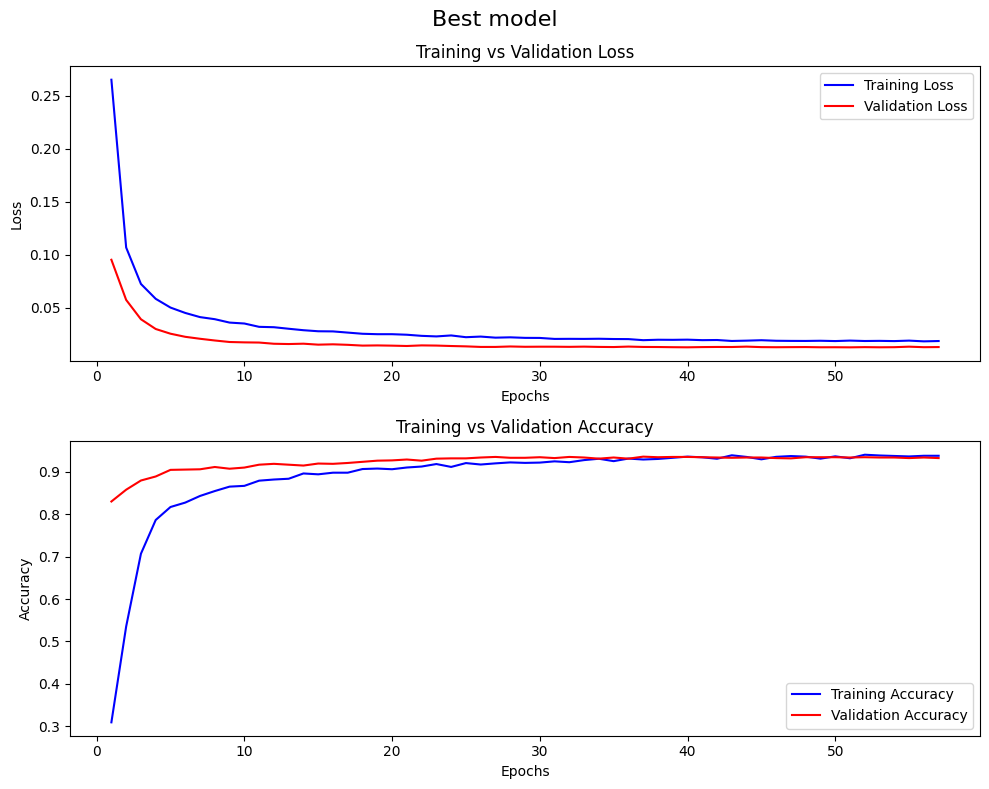

In [70]:
make_graphs(hist, "Best model")

In [74]:
print(max(hist.history['val_accuracy']))

0.9350473880767822
